<a href="https://colab.research.google.com/github/DanielHernandezGalvez/Arkanoid-game/blob/main/metricas_descanso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

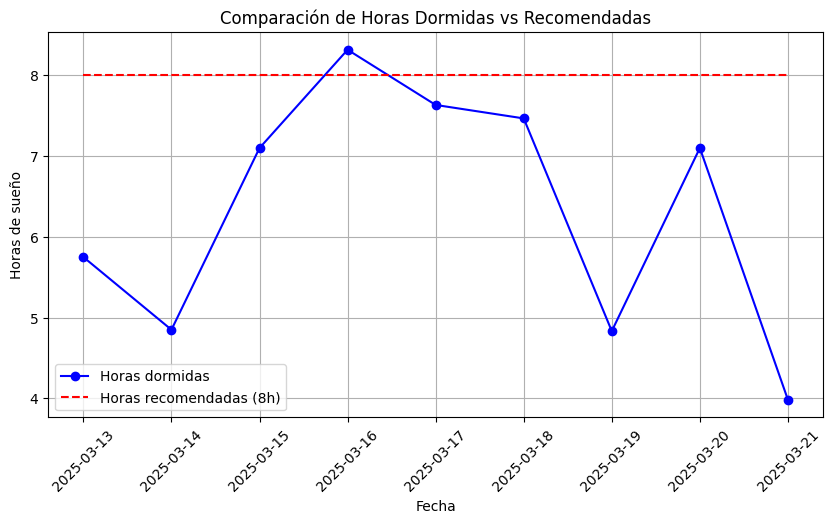

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

sheet_id = "1MdPYPcMC_Ujxbt7xr5qrsU_r46BdZEYV5gJop4_CrV0"
sheet_name = "Hoja1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

# Asegurar que los nombres de las columnas están limpios
df.columns = df.columns.str.strip()

# Convertir la columna 'fecha' a formato datetime para graficar
df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y", errors="coerce")

# Función para convertir "hh:mm" a decimal (ejemplo: "5:30" → 5.5)
def hhmm_a_decimal(hhmm):
    try:
        horas, minutos = map(int, hhmm.split(":"))
        return horas + (minutos / 60)
    except ValueError:
        return float("nan")  # Si el formato es incorrecto, devolver NaN

# Aplicar la conversión en la columna "horas totales"
df["horas_totales"] = df["horas totales"].astype(str).apply(hhmm_a_decimal)

# Espaciador
def espacio(veces):
  print("\n" * veces)

# Eliminar filas con valores NaN en "horas_totales"
df = df.dropna(subset=["horas_totales"])

# Función para calcular horas faltantes de sueño por día
def horas_faltantes(dormidas):
    horas_necesarias = 8
    return max(horas_necesarias - dormidas, 0)

df["Horas Faltantes"] = df["horas_totales"].apply(horas_faltantes)

# Agregar columna de horas ideales (8h) para la gráfica
df["horas_ideales"] = 8

# --- GRÁFICO DIARIO ---
plt.figure(figsize=(10, 5))
plt.plot(df["fecha"], df["horas_totales"], marker="o", linestyle="-", label="Horas dormidas", color="blue")
plt.plot(df["fecha"], df["horas_ideales"], linestyle="--", label="Horas recomendadas (8h)", color="red")

# Personalización del gráfico
plt.xlabel("Fecha")
plt.ylabel("Horas de sueño")
plt.title("Comparación de Horas Dormidas vs Recomendadas")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


espacio(1)




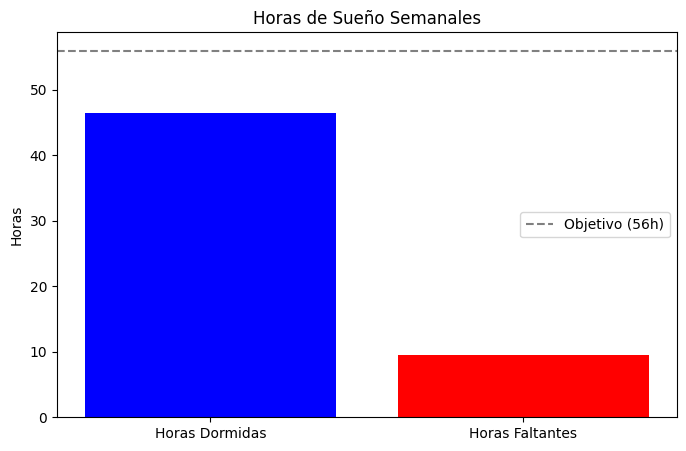


 Te faltaron 9.57 horas de sueño esta semana.


In [20]:
# --- FUNCIÓN PARA CALCULAR HORAS FALTANTES EN LA SEMANA ---
def calcular_sueño_semanal(df):
    df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y")

    # Ordenar por fecha y seleccionar los últimos 7 días
    df = df.sort_values(by="fecha", ascending=False).head(7)

    objetivo_semanal = 8 * 7
    horas_dormidas = df["horas_totales"].sum()
    horas_faltantes = max(objetivo_semanal - horas_dormidas, 0)

    # Gráfico de resumen semanal
    plt.figure(figsize=(8, 5))
    plt.bar(["Horas Dormidas", "Horas Faltantes"], [horas_dormidas, horas_faltantes], color=["blue", "red"])
    plt.axhline(y=56, color="gray", linestyle="--", label="Objetivo (56h)")
    plt.ylabel("Horas")
    plt.title("Horas de Sueño Semanales")
    plt.legend()
    plt.show()

    return horas_faltantes

# Llamar a la función y mostrar el resultado
horas_faltantes = calcular_sueño_semanal(df)
print(f"\n Te faltaron {horas_faltantes:.2f} horas de sueño esta semana.")

In [21]:
# promedio de horas de sueñp

if "minutos totales" in df.columns:
    df.rename(columns={"minutos totales": "minutos_totales"}, inplace=True)

# Calcular el promedio diario en horas
promedio_diario = (df["minutos_totales"] / 60).mean()

# Convertir a formato hh:mm
horas = int(promedio_diario)
minutos = int((promedio_diario - horas) * 60)

# Imprimir el resultado en formato horas:minutos
print(f"Promedio diario de sueño: {horas}:{minutos:02d} horas")

Promedio diario de sueño: 6:20 horas
